# Problem Statement:

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#fetching the csv file into dataframe
df = pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
#looking at the shape of dataframe
df.shape

(209593, 37)

In [4]:
#Printing all the features of file
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

#### Feature Description:
    label :Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    msisdn :mobile number of user
    aon :age on cellular network in days
    daily_decr30 :Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    daily_decr90 :Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    rental30 :Average main account balance over last 30 days
    rental90 :Average main account balance over last 90 days
    last_rech_date_ma :Number of days till last recharge of main account
    last_rech_date_da : Number of days till last recharge of data account
    last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
    cnt_ma_rech30 : Number of times main account got recharged in last 30 days
    fr_ma_rech30 : Frequency of main account recharged in last 30 days
    sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    cnt_ma_rech90 : Number of times main account got recharged in last 90 days
    fr_ma_rech90 : Frequency of main account recharged in last 90 days
    sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indian Rupee)
    medianamnt_ma_rech90 :Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
    medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
    cnt_da_rech30 : Number of times data account got recharged in last 30 days
    fr_da_rech30 : Frequency of data account recharged in last 30 days
    cnt_da_rech90 : Number of times data account got recharged in last 90 days
    fr_da_rech90 : Frequency of data account recharged in last 90 days
    cnt_loans30 : Number of loans taken by user in last 30 days
    amnt_loans30 : Total amount of loans taken by user in last 30 days
    maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
    medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
    cnt_loans90: Number of loans taken by user in last 90 days
    amnt_loans90 :Total amount of loans taken by user in last 90 days
    maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
    medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
    payback30 :Average payback time in days over last 30 days
    payback90: Average payback time in days over last 90 days
    pcircle: telecom circle
    pdate :date


In [5]:
#checking null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Data is clean

In [6]:
#Removing first feature
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
#Brief info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

#### We have (21+12)numeric cols and 3 categorical. Out of the listed ones, payback30 and payback90 needs to be converted to timestamp

In [8]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

'msisdn' is mobile number for every user which should be unique for every data. The unique values are less than total data which represents the presence of duplicated

We have several features who have limited unique values. Lets explore them. Also 'pcircle' has only one unique value which can be dropped

In [9]:
df.drop('pcircle', axis = 1, inplace = True)
df.shape

(209593, 35)

In [10]:
#finding duplicates features if any
df1 = df.copy() #making a copy of unchanged df

duplicate_features = df.T
print(duplicate_features.duplicated().sum())

0


#### No duplicate features which have identical values. 

In [11]:
#Checking along the rows
df.duplicated().sum()

1

#### We have 1 entry which have identical values along all the feature

In [12]:
#lets view them
df.loc[df.duplicated(keep = False), :].style

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
51093,1,82741I90849,367.000000,3136.666667,3136.666667,3320.950000,3320.950000,1.000000,0.000000,770,5,1.000000,8666.000000,1539.000000,96.000000,5,1,8666,1539.000000,96.000000,0.000000,0.000000,0,0,4,24,6.000000,0.000000,4.000000,24,6,0.000000,42.750000,42.750000,2016-07-23
198194,1,82741I90849,367.000000,3136.666667,3136.666667,3320.950000,3320.950000,1.000000,0.000000,770,5,1.000000,8666.000000,1539.000000,96.000000,5,1,8666,1539.000000,96.000000,0.000000,0.000000,0,0,4,24,6.000000,0.000000,4.000000,24,6,0.000000,42.750000,42.750000,2016-07-23


In [13]:
#will drop one of the identical rows 
df = df.drop_duplicates(keep = 'first')

In [14]:
df1.shape, df.shape #verifying the removal of duplicate rows

((209593, 35), (209592, 35))

In [15]:
#duplicates along particular columns (like msisdn)
df.msisdn.duplicated().sum()

23349

In [16]:
df.loc[df.duplicated(subset = 'msisdn', keep= 'first'), :]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
1902,1,09901I95206,138.000000,900.000000,900.000000,434.78,434.78,0.0,0.0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-17
2280,1,14791I90583,1659.000000,124.754667,124.754667,813.45,813.45,1.0,0.0,4048,...,18,6.0,0.0,3.0,18,6,0.0,2.333333,2.333333,2016-06-11
2395,1,70401I85339,1419.000000,616.160000,619.100000,556.88,589.76,1.0,0.0,773,...,24,6.0,0.5,4.0,24,6,0.5,8.500000,8.500000,2016-07-02
2909,1,40881I89238,108.000000,96.616000,96.616000,674.83,674.83,48.0,0.0,11327,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-13
3674,1,41251I91190,363.000000,8615.000000,8713.490000,498.81,2356.11,5.0,0.0,770,...,24,6.0,0.0,8.0,48,6,0.0,4.666667,4.000000,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209576,1,70448I82734,811881.372822,149.760000,149.760000,922.20,922.20,4.0,0.0,12500,...,12,6.0,0.0,2.0,12,6,0.0,5.500000,5.500000,2016-06-15
209577,1,60261I84455,1007.000000,5079.832000,5104.540000,2844.84,3064.68,2.0,0.0,1539,...,36,6.0,0.0,6.0,36,6,0.0,1.600000,1.600000,2016-07-06
209586,1,60331I70370,254.000000,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,1539,...,66,12.0,0.0,15.0,120,12,0.0,3.000000,2.400000,2016-07-22
209589,1,95583I84455,1075.000000,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12


In [17]:
#removing duplicates rows in msisdn
df = df.drop_duplicates(subset = 'msisdn', keep = 'first')
df.shape

(186243, 35)

### Checking quasi constant features

In [18]:
num_col = [x for x in df.columns if df[x].dtype in ['int64', 'float64']]
numeric_cols = df[num_col].copy()

In [19]:
from sklearn.feature_selection import VarianceThreshold

constant_feature = VarianceThreshold(threshold = 0.05) #setting the threshold to 5% variance
constant_feature.fit(numeric_cols.iloc[:, 1:])

print('No. of feature retained: ', sum(constant_feature.get_support()))

print('No. of features to be removed: ', len(numeric_cols.iloc[:, 1:].columns) - sum(constant_feature.get_support()))

quasi_constant_feature = [i for i in numeric_cols.iloc[ :, 1:].columns  if i not in  numeric_cols.iloc[ :, 1:].columns[constant_feature.get_support()]]
print('\nFeature which is quasi_constant:', quasi_constant_feature)

No. of feature retained:  30
No. of features to be removed:  2

Feature which is quasi_constant: ['medianamnt_loans30', 'medianamnt_loans90']


In [20]:
pd.DataFrame(df[['medianamnt_loans30', 'medianamnt_loans90']].value_counts())

0
medianamnt_loans30 medianamnt_loans90        
0.0                0.0                 172789
1.0                1.0                   5547
0.5                0.5                   4198
                   0.0                   1629
1.0                0.5                    594
                   0.0                    492
0.0                0.5                    397
2.0                2.0                    288
0.5                1.0                     81
0.0                1.0                     78
2.0                1.0                     59
                   0.0                     42
1.5                1.5                     15
                   1.0                     10
2.0                0.5                      8
1.5                0.0                      5
                   0.5                      5
2.0                1.5                      3
3.0                3.0                      3

#### Since, most of the values are 0 in these features, we can drop these columns

In [21]:
df.drop(['medianamnt_loans30', 'medianamnt_loans90'], axis = 1, inplace = True)

In [22]:
df.shape

(186243, 33)

In [23]:
#Let's look at the categorical columns
cat_col = [x for x in df.columns if df[x].dtype in ['object']]
categorical_cols = df[cat_col].copy()

In [24]:
categorical_cols

,msisdn,pdate
0,21408I70789,2016-07-20
1,76462I70374,2016-08-10
2,17943I70372,2016-08-19
3,55773I70781,2016-06-06
4,03813I82730,2016-06-22
...,...,...
209585,12227I90843,2016-07-04
209587,19900I95200,2016-08-02
209588,22758I85348,2016-06-17
209591,59712I82733,2016-07-25


In [25]:
df['pdate'].value_counts()

2016-07-05    2825
2016-07-07    2792
2016-07-04    2790
2016-06-20    2785
2016-06-17    2770
              ... 
2016-06-04    1395
2016-08-18    1226
2016-08-19     970
2016-08-20     675
2016-08-21     276
Name: pdate, Length: 82, dtype: int64

<AxesSubplot:>

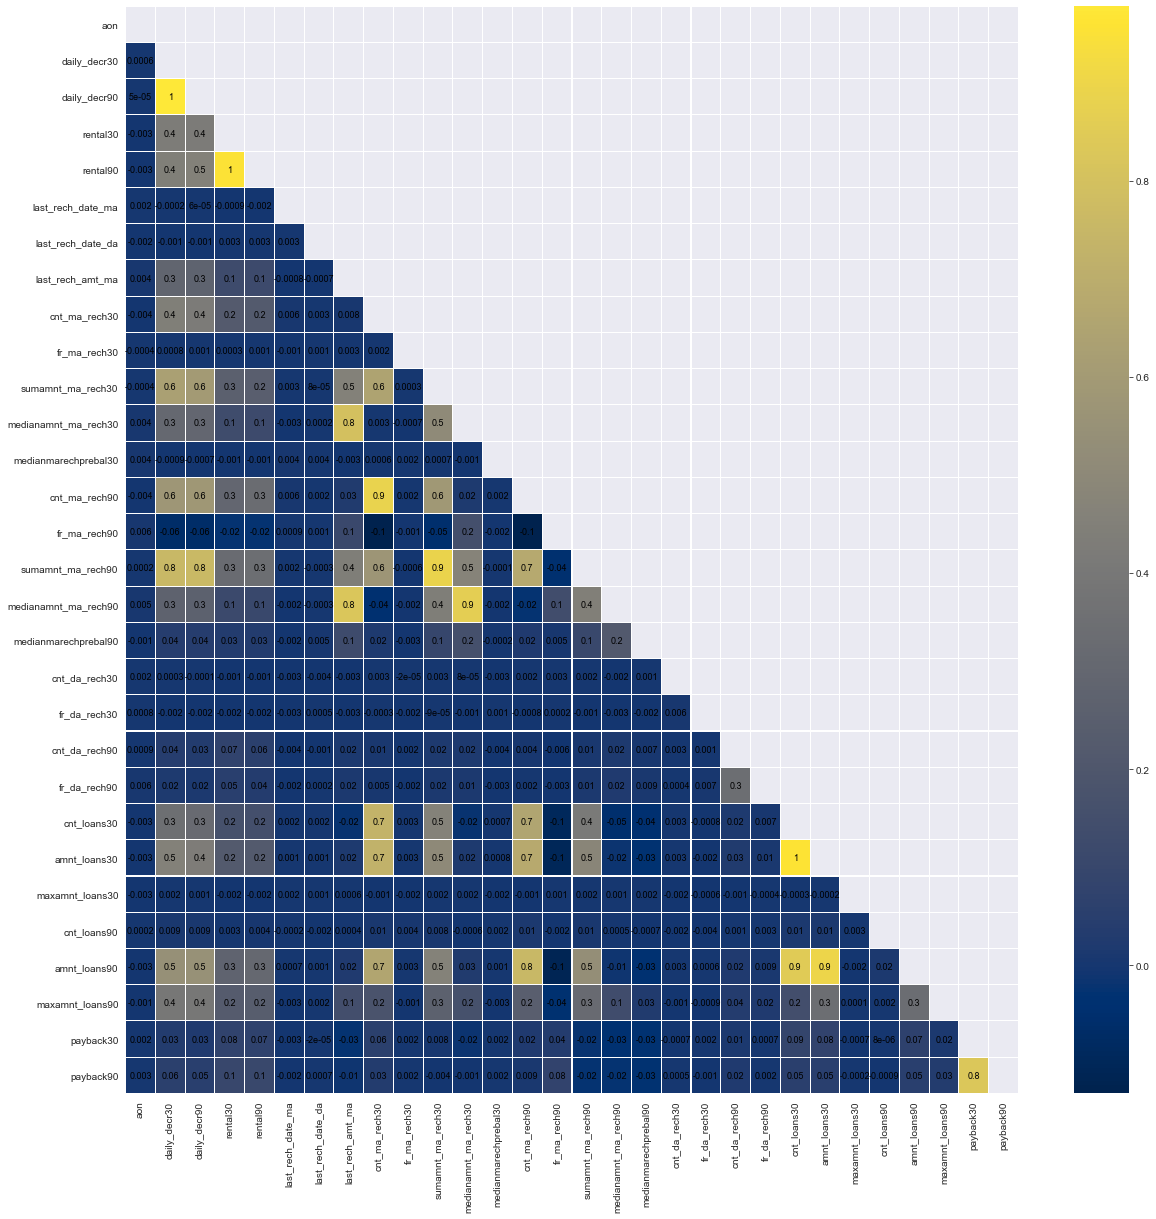

In [26]:
#plotting correlation matrix in heatmap
plt.figure(figsize = (20,20))
corr = df.iloc[:, 1:].corr()  #excluding target variable
features = corr.index
mask = np.triu(np.ones_like(features, dtype=bool))
sns.set_style('darkgrid')
sns.heatmap(df[features].corr(), annot = True, cmap = plt.cm.cividis, fmt = '.1g', linewidth = 0.1,
            mask = mask, annot_kws = {'size':9, 'color' : 'black'})

#### There are several features which are highly correlated with each other and need to be dropped to avoid multicollinearity

In [27]:
#defining a function wherein independent variables are highly correlated 
def high_coorelation(df, threshold):   #threshold varies upon domain knowledge
    high_corr = []   #list of highly related features
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                columns = corr_matrix.columns[i]
                high_corr.append(columns)
    
    return high_corr

In [28]:
high_coorelation(df.iloc[:, 1:], 0.85)

['daily_decr90',
 'rental90',
 'cnt_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'amnt_loans30',
 'amnt_loans90',
 'amnt_loans90']

#### From the heatmap:
    1. daily_decr30 & daily_decr90 are linearly related (100%)
    2. rental30 & rental90 are related (100%)
    3. amnt_loans30 & cnt_loans30 have high relation (100%)
    4. cnt_ma_rech30 & cnt_ma_rech90 have 90% relation
    5. sumamnt_ma_rech90 & sumamnt_ma_rech90 have 90% relation
    6. amnt_loans90 have 90% relation with cnt_loans30 & amnt_loans30

In [29]:
#drop these columns to resolve multicollinearity
df.drop(['daily_decr90', 'rental30','cnt_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','amnt_loans30','amnt_loans90'],
       axis = 1, inplace = True)

In [30]:
df.shape

(186243, 26)

In [31]:
#separating 'pdate' columns to its corresponding individual format
df['Day'] = pd.to_datetime(df['pdate'], format = '%Y/%m/%d').dt.day
df['Month'] = pd.to_datetime(df['pdate'], format = '%Y/%m/%d').dt.month
df['Year'] = pd.to_datetime(df['pdate'], format = '%Y/%m/%d').dt.year

In [32]:
df.head()

,label,msisdn,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,260.13,2.0,0.0,1539,2,21.0,...,2,6.0,2.0,6,29.000000,29.000000,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,...,1,12.0,1.0,12,0.000000,0.000000,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,1,6.0,1.0,6,0.000000,0.000000,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,2,6.0,2.0,6,0.000000,0.000000,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,7,6.0,7.0,6,2.333333,2.333333,2016-06-22,22,6,2016


In [33]:
#dropping pdate column
df.drop('pdate', axis =1, inplace = True)
df.shape

(186243, 28)

In [34]:
#looking at the datatype of newly created features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186243 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 186243 non-null  int64  
 1   msisdn                186243 non-null  object 
 2   aon                   186243 non-null  float64
 3   daily_decr30          186243 non-null  float64
 4   rental90              186243 non-null  float64
 5   last_rech_date_ma     186243 non-null  float64
 6   last_rech_date_da     186243 non-null  float64
 7   last_rech_amt_ma      186243 non-null  int64  
 8   cnt_ma_rech30         186243 non-null  int64  
 9   fr_ma_rech30          186243 non-null  float64
 10  sumamnt_ma_rech30     186243 non-null  float64
 11  medianamnt_ma_rech30  186243 non-null  float64
 12  medianmarechprebal30  186243 non-null  float64
 13  fr_ma_rech90          186243 non-null  int64  
 14  medianmarechprebal90  186243 non-null  float64
 15  

In [35]:
num_cols, cat_cols = [], []
for i in df.columns:
    if df[i].dtype == object:
        cat_cols.append(i)
    elif (df[i].dtype == 'float64') | (df[i].dtype == 'int64') :
        num_cols.append(i)
    else:
        continue
    
print('Numeric columns: ', len(num_cols), '\n', num_cols)
print('\nCategorical columns:', len(cat_cols), '\n', cat_cols)

Numeric columns:  27 
 ['label', 'aon', 'daily_decr30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'Day', 'Month', 'Year']

Categorical columns: 1 
 ['msisdn']


### Data Analysis & Visualization

Text(0.5, 1.0, 'Correlation with Target')

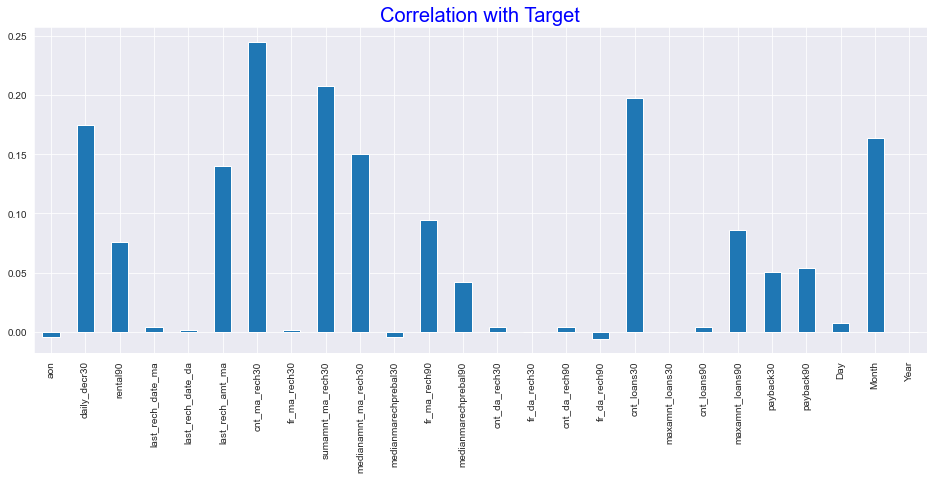

In [36]:
#Relation of variables with dependent target 
plt.figure(figsize = (16,6))
df.drop('label',axis=1).corrwith(df['label']).plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Correlation with Target',fontsize = 20, color='b' )

#### Observation: cnt_ma_rech30 & sumamnt_ma_rech30 have significant relation with target variable

In [37]:
#getting the unique values count of numeric columns
for i in df[num_cols].columns:
    print(str(i) + ':' + str(df[i].nunique()))
    print('\n')

label:2


aon:4282


daily_decr30:130323


rental90:125595


last_rech_date_ma:1061


last_rech_date_da:1061


last_rech_amt_ma:70


cnt_ma_rech30:62


fr_ma_rech30:961


sumamnt_ma_rech30:13130


medianamnt_ma_rech30:501


medianmarechprebal30:28486


fr_ma_rech90:89


medianmarechprebal90:28064


cnt_da_rech30:949


fr_da_rech30:960


cnt_da_rech90:27


fr_da_rech90:46


cnt_loans30:36


maxamnt_loans30:924


cnt_loans90:968


maxamnt_loans90:3


payback30:1249


payback90:2128


Day:31


Month:3


Year:1




#### Observation:
    1. maxamnt_loans90 has only 3 unique values
    2. Month listed are 3
    3. The year is specific to one which can be dropped as it will not be relevant for model prediction

(array([0, 1, 2]), [Text(0, 0, '6'), Text(1, 0, '12'), Text(2, 0, '0')])

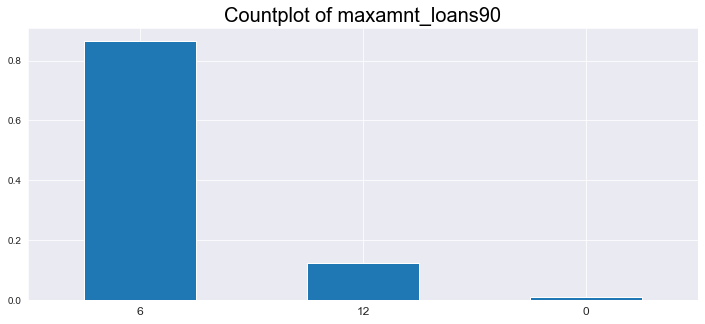

In [38]:
plt.figure(figsize = (12,5))
df['maxamnt_loans90'].value_counts(normalize=True).plot(kind='bar')
plt.title('Countplot of maxamnt_loans90', fontsize = 20, color = '0')
plt.xticks(rotation = '0', fontsize = 12)

#### Over 80% of the people have to return the loan of 6 after 90days

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '11'),
  Text(1, 0, '5'),
  Text(2, 0, '6'),
  Text(3, 0, '7'),
  Text(4, 0, '12'),
  Text(5, 0, '10'),
  Text(6, 0, '13'),
  Text(7, 0, '15'),
  Text(8, 0, '8'),
  Text(9, 0, '14'),
  Text(10, 0, '1'),
  Text(11, 0, '2'),
  Text(12, 0, '9'),
  Text(13, 0, '17'),
  Text(14, 0, '3'),
  Text(15, 0, '16'),
  Text(16, 0, '18'),
  Text(17, 0, '4'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '23'),
  Text(22, 0, '22'),
  Text(23, 0, '27'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '30'),
  Text(27, 0, '24'),
  Text(28, 0, '29'),
  Text(29, 0, '28'),
  Text(30, 0, '31')])

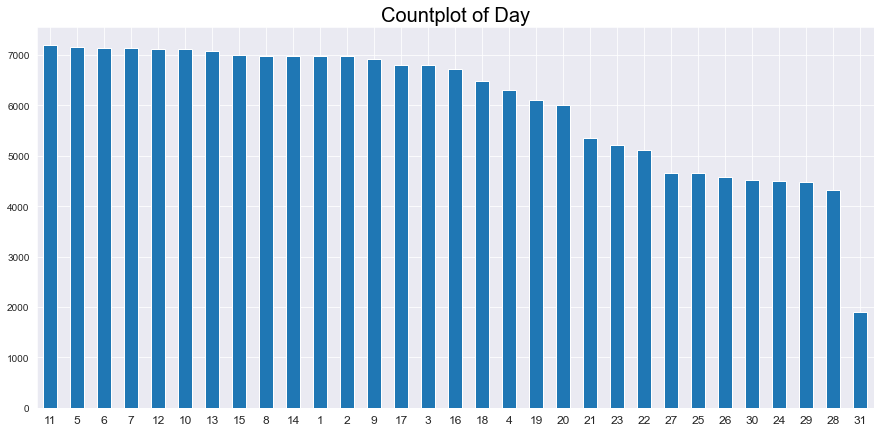

In [39]:
plt.figure(figsize = (15,7))
df['Day'].value_counts().plot(kind = 'bar')
plt.title('Countplot of Day', fontsize = 20, color = '0')
plt.xticks(rotation = '0', fontsize=12)

#### We can infer that as the end of the month approaches, we see decline in number of people

(array([0, 1, 2]), [Text(0, 0, '7'), Text(1, 0, '6'), Text(2, 0, '8')])

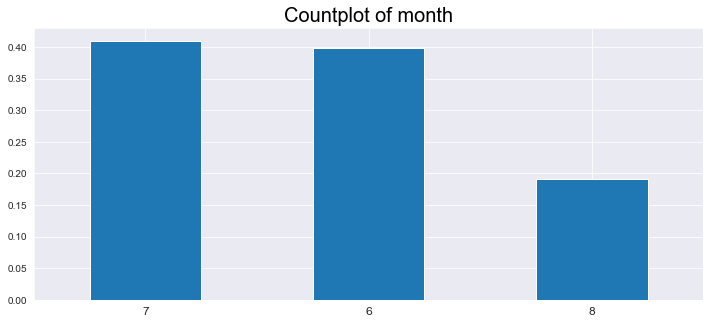

In [40]:
plt.figure(figsize = (12,5))
df['Month'].value_counts(normalize=True).plot(kind='bar')
plt.title('Countplot of month', fontsize = 20, color = '0')
plt.xticks(rotation = '0', fontsize = 12)

#### June & July have same propotion of people and August is relatively occupied less

In [41]:
df['Year'].value_counts()

2016    186243
Name: Year, dtype: int64

In [42]:
#As the year of data is 2016, we can drop the columns
df.drop('Year', axis = 1, inplace = True)

In [43]:
num_cols.pop(-1)

'Year'

In [44]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30',
       'cnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'Day',
       'Month'],
      dtype='object')

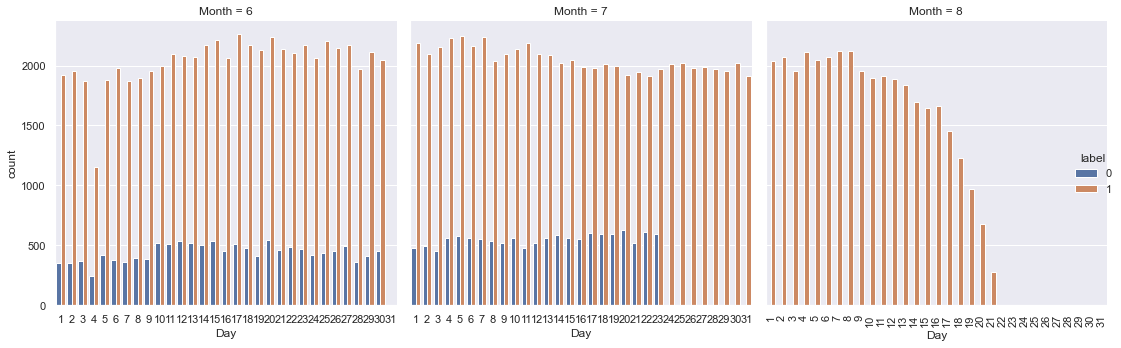

In [45]:
#plotting label vs day graph to analyse the trend
sns.set(rc={"figure.figsize": (20, 20)})
sns.catplot(x='Day', data=df, hue = 'label', col = 'Month', kind = 'count')
plt.xticks(rotation = 90)
plt.tight_layout()

#### Observation:
    1. For month June(6) - day from 10-20 has seen defaulter customers
    2. For month July(7) - Customers are likely to be defaulter in first three weeks
    3. For month August(8) - No customers are defaulter.

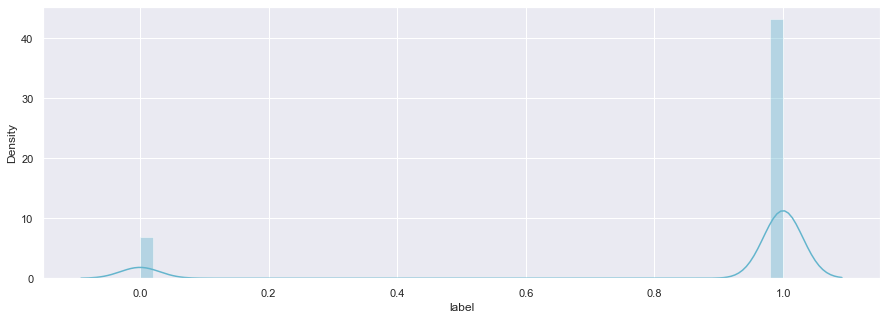

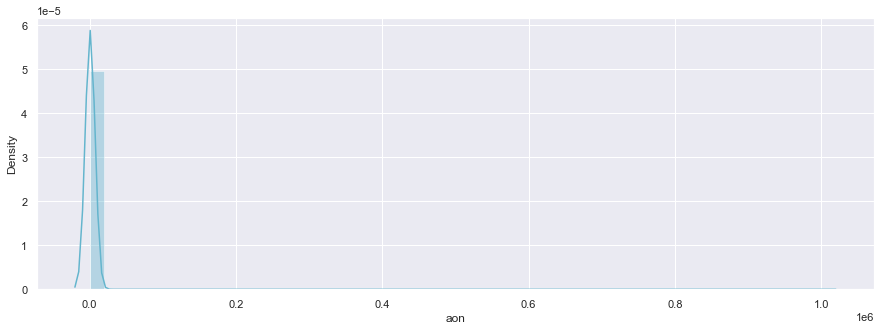

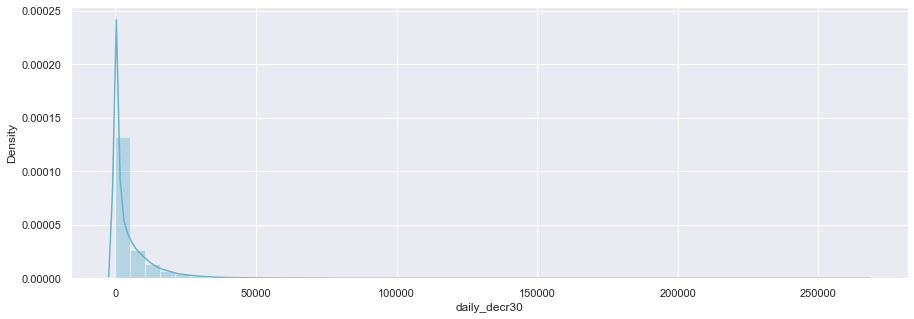

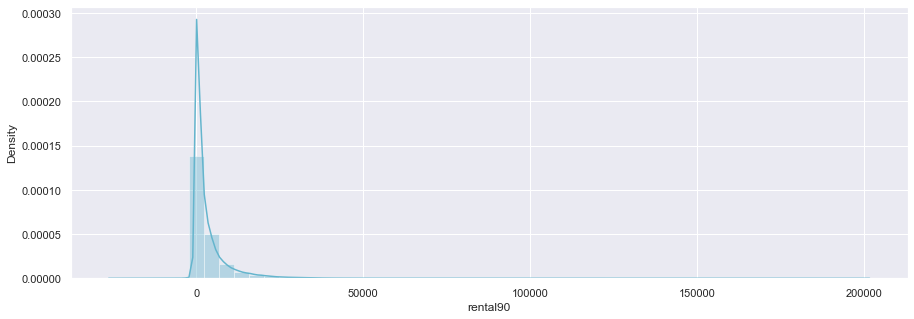

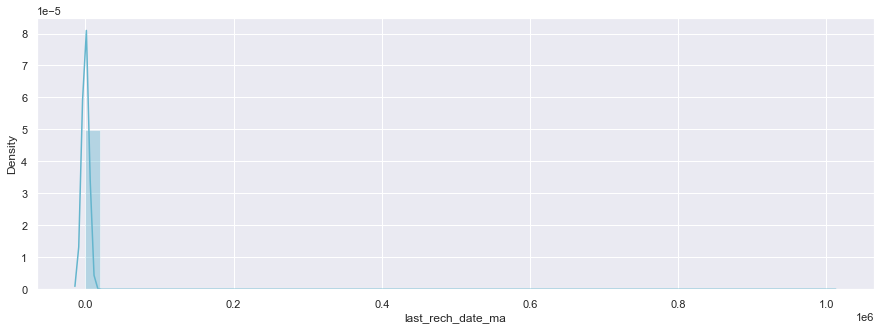

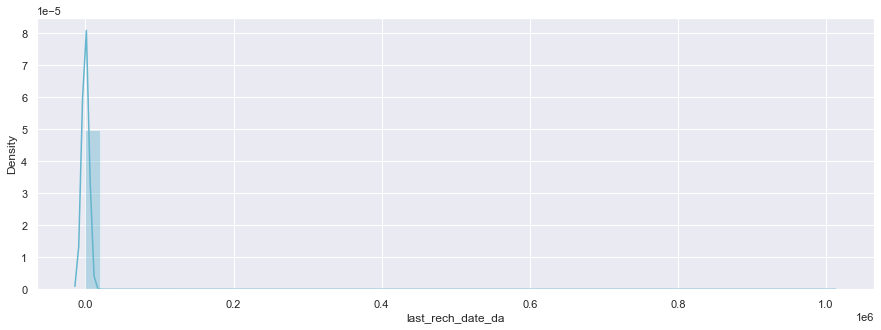

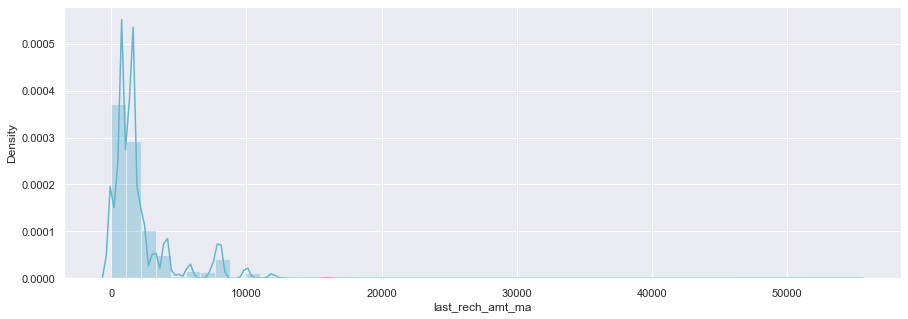

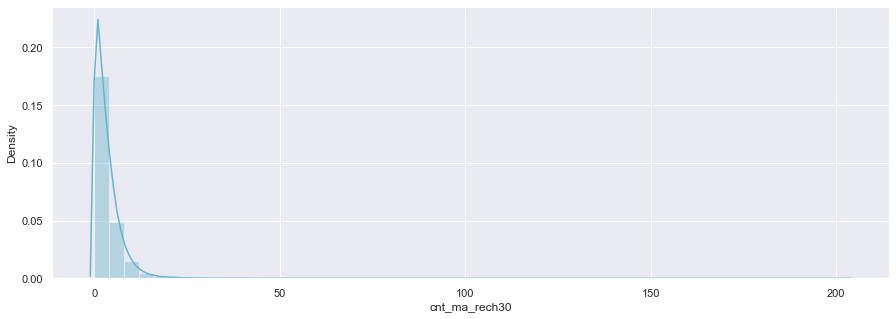

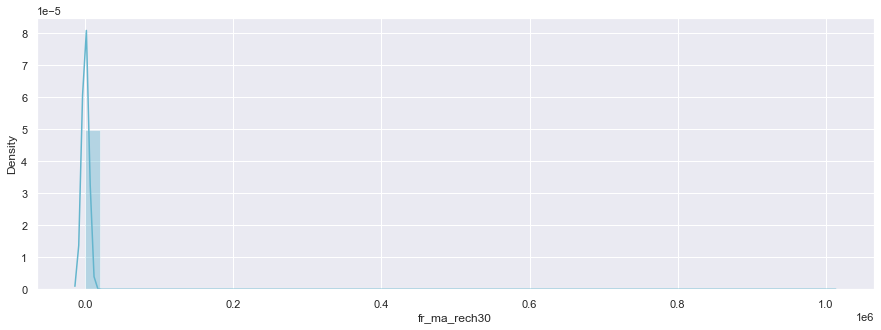

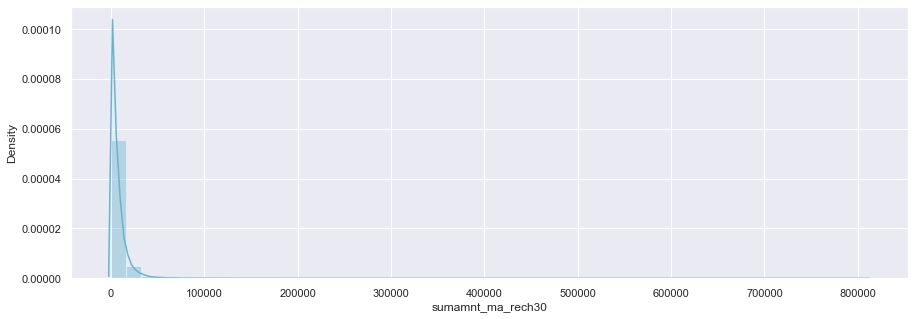

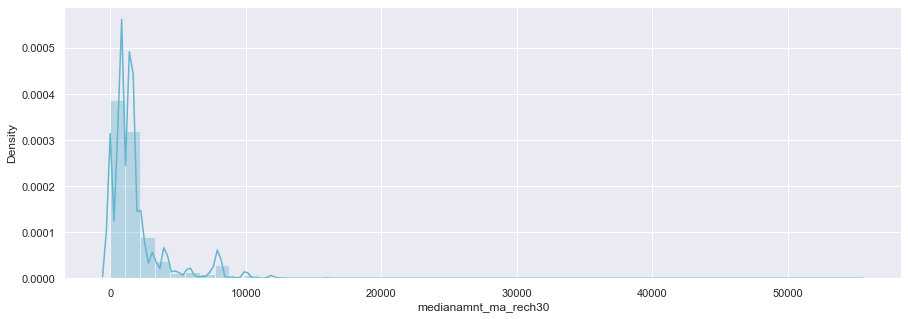

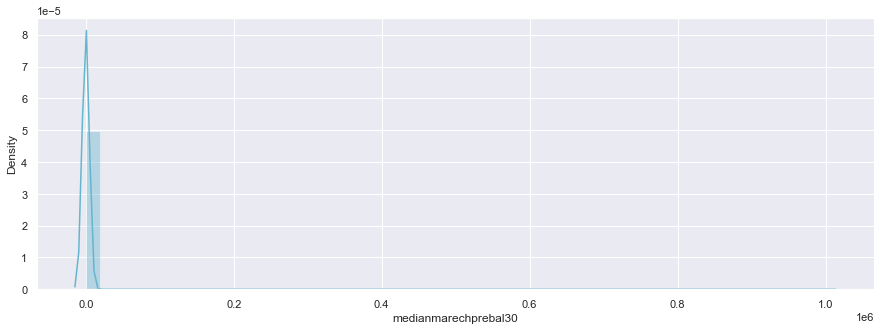

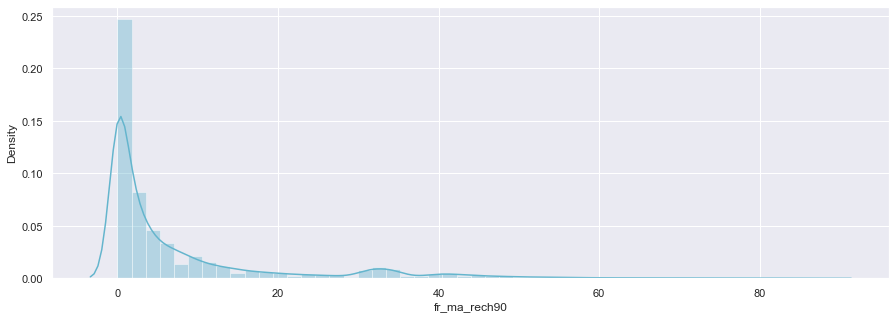

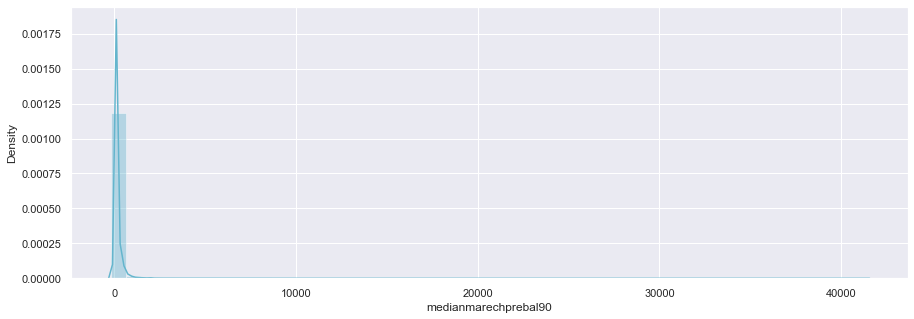

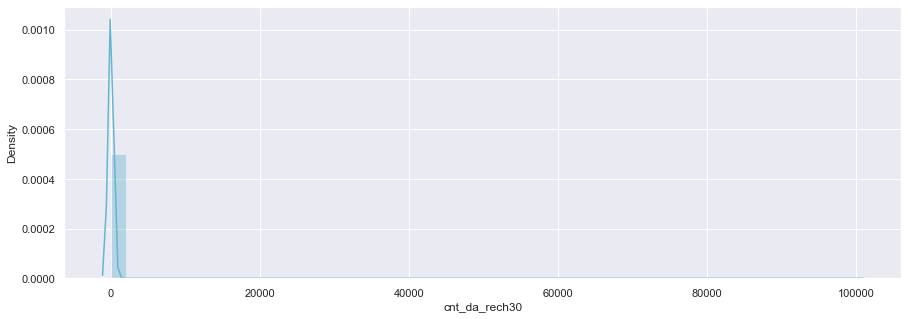

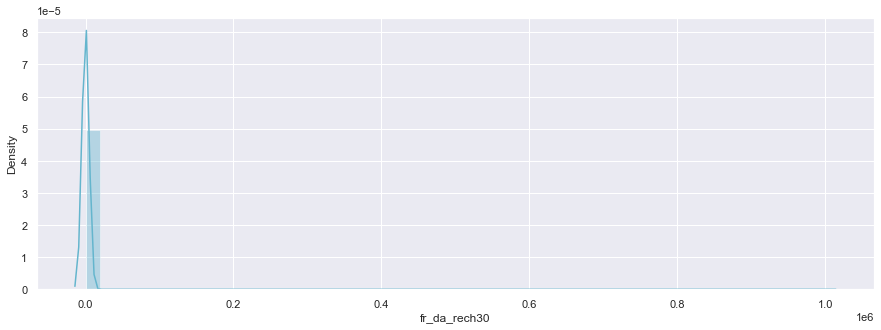

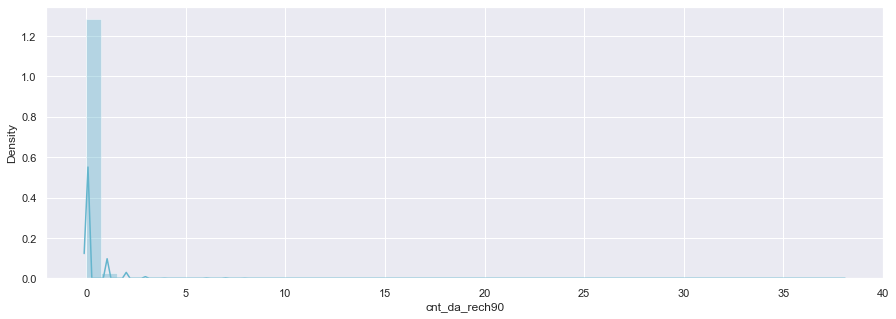

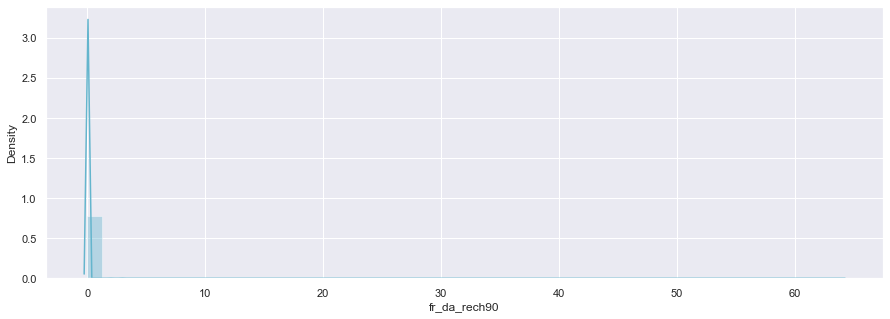

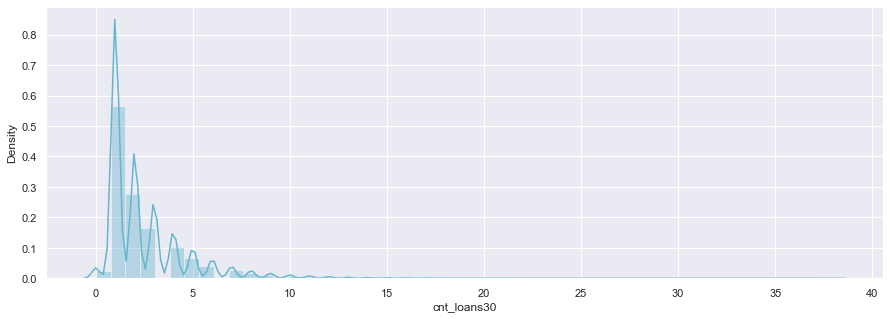

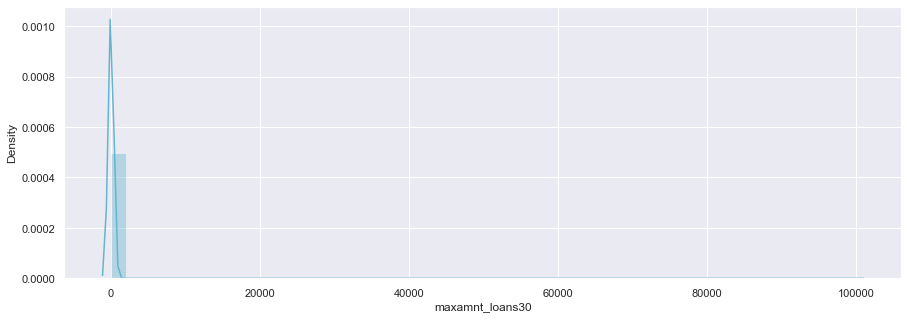

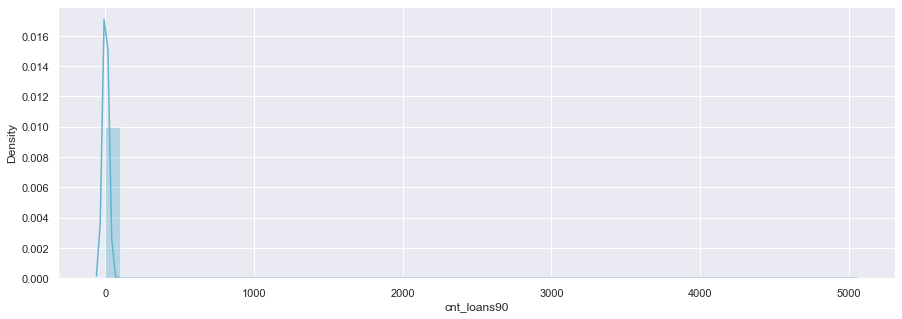

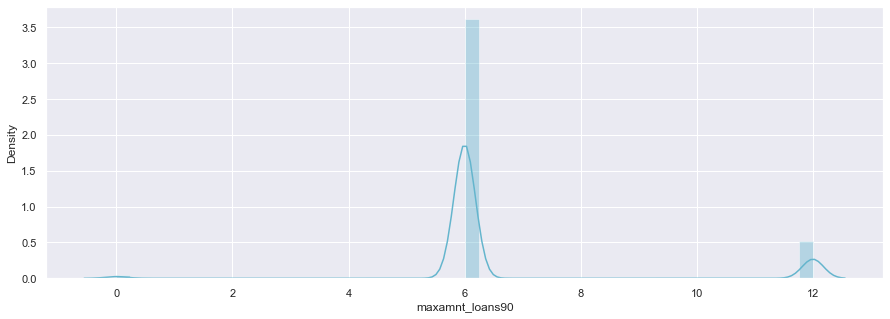

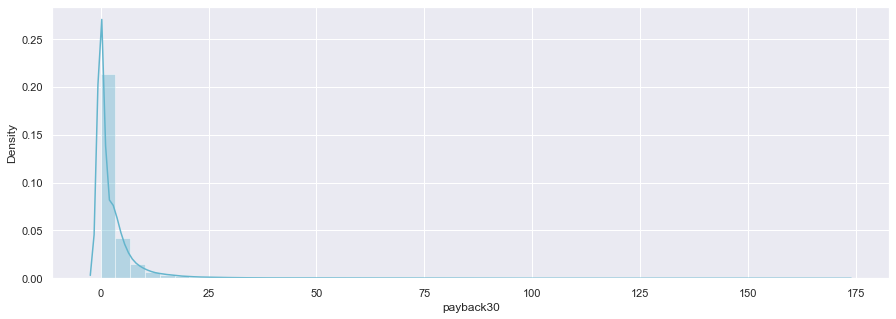

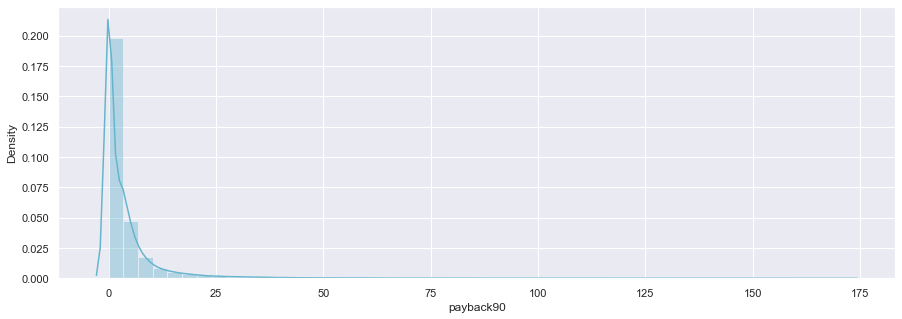

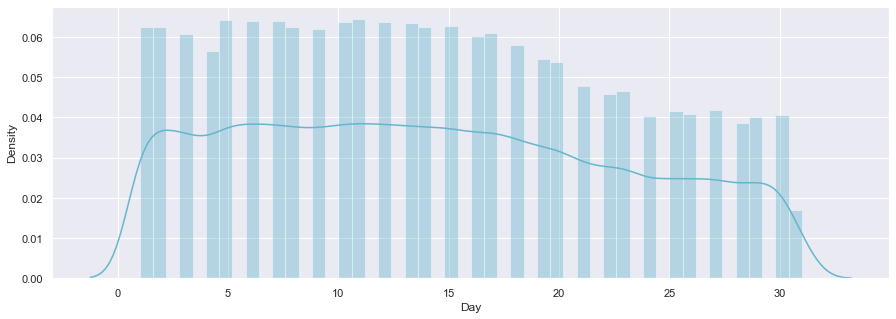

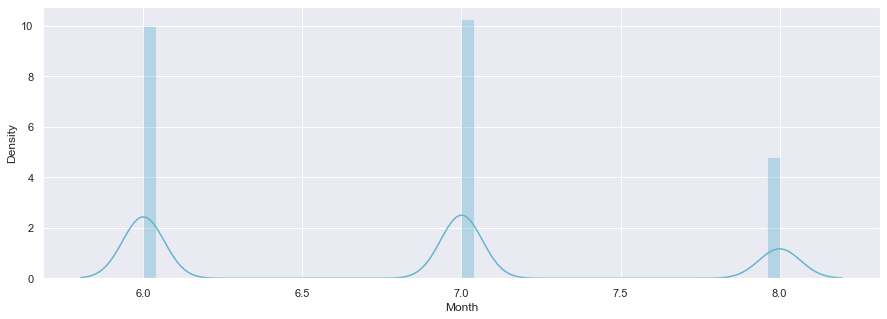

In [46]:
#distribution plot of feature
sns.set(rc={"figure.figsize": (15,5)})
for cols in df[num_cols].columns:
    sns.distplot(df[cols], color = 'c')
    plt.show()

#### All the features are right handed skewed except for the Day & Month

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,186243.0,0.861149,0.345792,0.000000,1.000,1.000000,1.000000,1.000000
aon,186243.0,8145.172831,75865.800335,-48.000000,241.000,522.000000,979.000000,999860.755168
daily_decr30,186243.0,5049.834558,8758.493684,-93.012667,38.522,1332.110667,6710.066667,265926.000000
rental90,186243.0,3401.366654,5720.521590,-24720.580000,288.000,1281.860000,4070.115000,200148.110000
last_rech_date_ma,186243.0,3728.482692,53744.726961,-29.000000,1.000,3.000000,7.000000,998650.377733
last_rech_date_da,186243.0,3732.953680,53563.651356,-29.000000,0.000,0.000000,0.000000,999171.809410
last_rech_amt_ma,186243.0,2073.202891,2415.927330,0.000000,770.000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,186243.0,3.646295,3.915321,0.000000,1.000,3.000000,5.000000,203.000000
fr_ma_rech30,186243.0,3710.729377,53423.442186,0.000000,0.000,2.000000,6.000000,999606.368132
sumamnt_ma_rech30,186243.0,7196.403199,9675.574979,0.000000,1539.000,4617.000000,9335.000000,810096.000000


#### observation:
    std is greater than mean in all features excpt 'label', 'maxamnt_loans90' & 'Month'

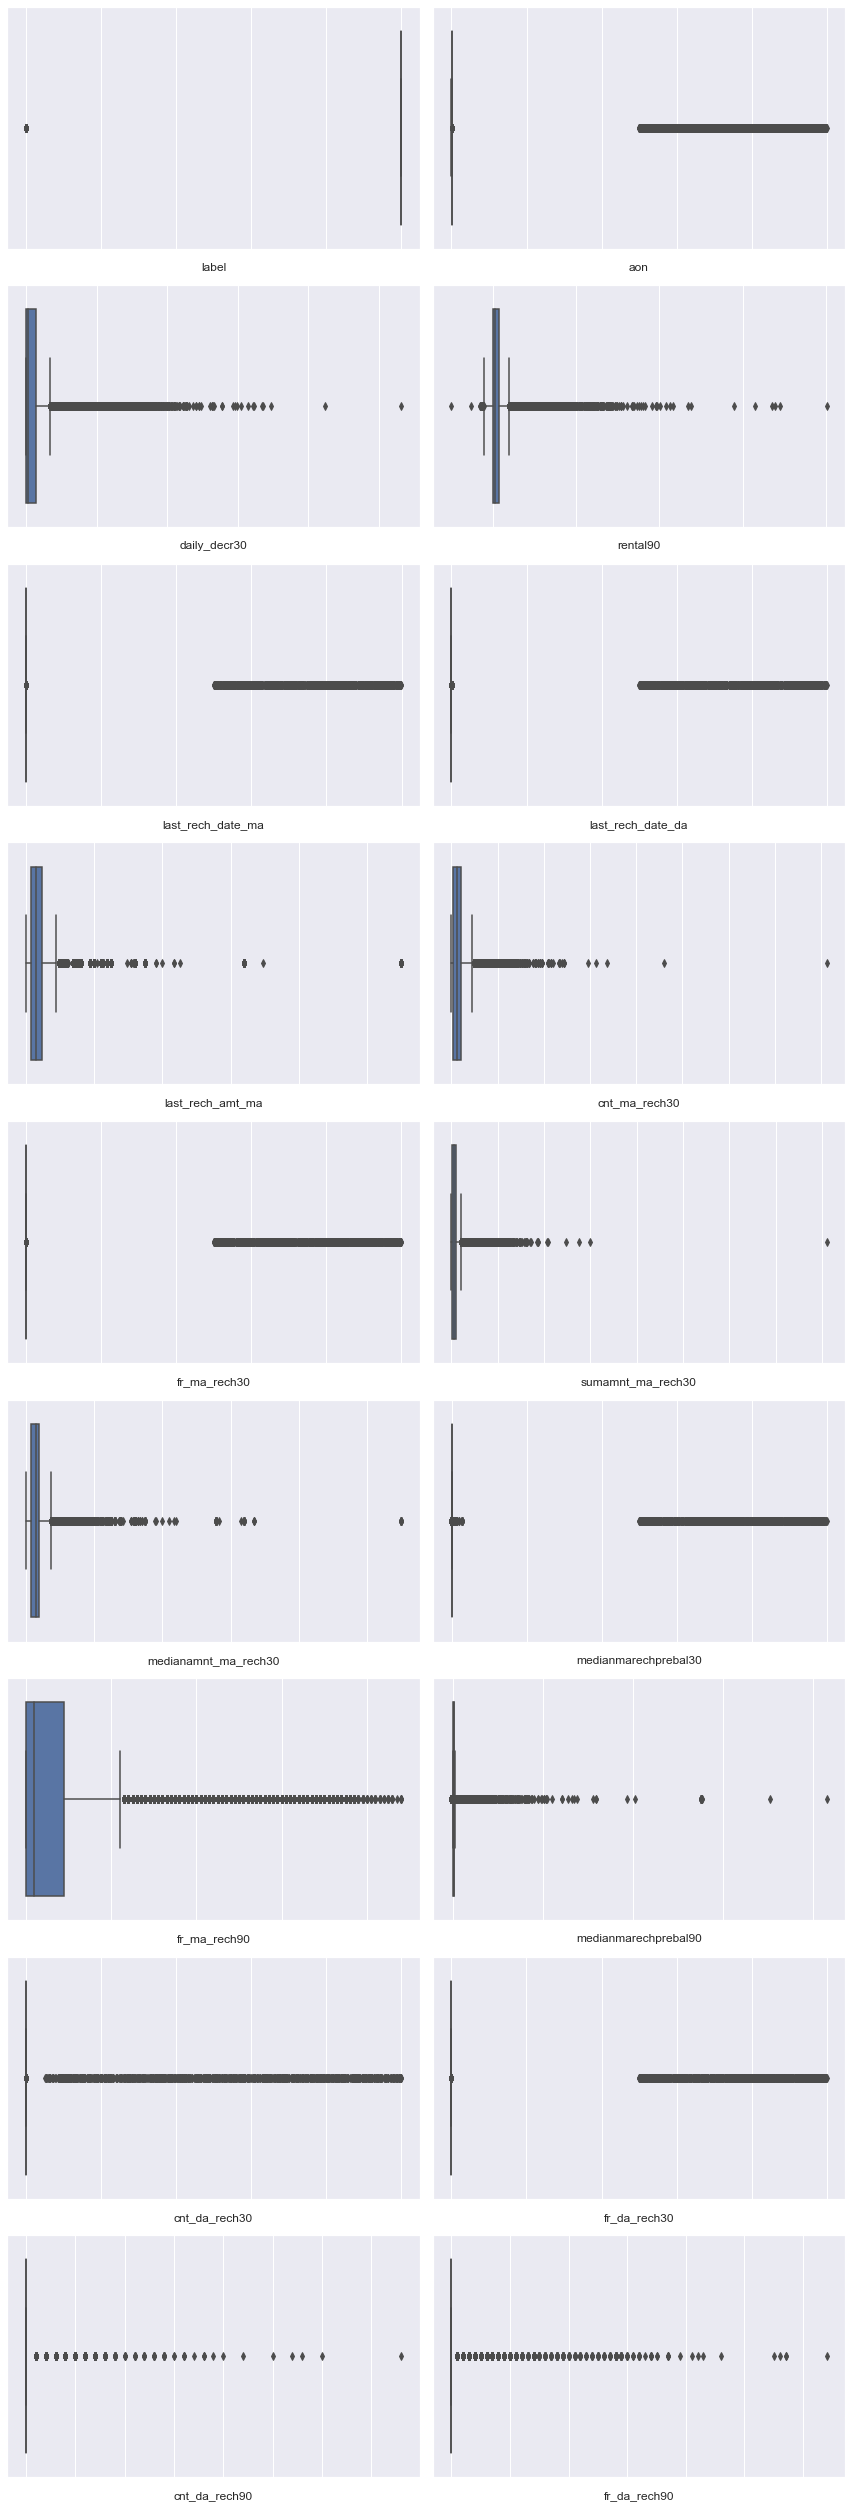

In [48]:
#plotting outliers
fig, axes = plt.subplots(round(len(df.describe().columns) / 3), 2, figsize=(12, 35))

for col, ax in enumerate(fig.axes):
    if col < len(df.describe().columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90,)
        sns.boxplot(x = df.describe().columns[col], data = df, ax = ax,)
fig.tight_layout()

#### Most of the feature got the outliers but considering the prvention of data loss, we could not remove more than 8% to 10% of the data

In [49]:
df2 = df.copy()
df1 = df2

In [50]:
df2.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30',
       'cnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'Day',
       'Month'],
      dtype='object')

In [51]:
#converting categorical columns to numerical in order to process zscore
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for column in df2.columns:
    if df2[column].dtype==np.number:
        continue
    df2[column]=encode.fit_transform(df2[column])

In [52]:
df2.head()

,label,msisdn,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
0,0,40191,272.0,3055.050000,260.13,2.0,0.0,14,2,21.0,...,0,0,2,6.0,2.0,1,29.000000,29.000000,19,1
1,1,142291,712.0,12122.000000,3691.26,20.0,0.0,38,1,0.0,...,0,0,1,12.0,1.0,2,0.000000,0.000000,9,2
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,0,0,1,6.0,1.0,1,0.000000,0.000000,18,2
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,0,0,2,6.0,2.0,1,0.000000,0.000000,5,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,0,0,7,6.0,7.0,1,2.333333,2.333333,21,0


In [53]:
#detecting outliers
from scipy.stats import zscore
z = np.abs(zscore(df2))
z

array([[2.49037591, 0.98449283, 0.10377791, ..., 2.32325254, 0.66650703,
        0.28076267],
       [0.40154581, 0.9145572 , 0.09797818, ..., 0.40750695, 0.51976436,
        1.63266114],
       [0.40154581, 1.10719639, 0.10031125, ..., 0.40750695, 0.54787989,
        1.63266114],
       ...,
       [0.40154581, 0.93473809, 0.10203799, ..., 0.31334283, 0.31062561,
        1.07113581],
       [0.40154581, 0.33976442, 0.08453335, ..., 0.58121631, 1.25964272,
        0.28076267],
       [0.40154581, 0.52343845, 0.08652371, ..., 0.40750695, 0.87564578,
        0.28076267]])

In [54]:
threshold = 4       #setting the threshold higher to avoid the loss of data
print(np.where(z>4))

(array([    21,     22,     30, ..., 186215, 186224, 186233], dtype=int64), array([13, 13,  5, ..., 10, 17, 11], dtype=int64))


In [55]:
df2_filtered = df2[(z<4).all(axis=1)]

In [56]:
print(df2_filtered.shape, '\t', df2.shape)

(165616, 27) 	 (186243, 27)


In [57]:
df2_filtered.head()

,label,msisdn,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
0,0,40191,272.0,3055.050000,260.13,2.0,0.0,14,2,21.0,...,0,0,2,6.0,2.0,1,29.000000,29.000000,19,1
1,1,142291,712.0,12122.000000,3691.26,20.0,0.0,38,1,0.0,...,0,0,1,12.0,1.0,2,0.000000,0.000000,9,2
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,0,0,1,6.0,1.0,1,0.000000,0.000000,18,2
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,0,0,2,6.0,2.0,1,0.000000,0.000000,5,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,0,0,7,6.0,7.0,1,2.333333,2.333333,21,0


In [58]:
#checking skewness
df2_filtered.skew()

label                   -2.044888
msisdn                  -0.000233
aon                      0.953584
daily_decr30             2.176009
rental90                 2.446816
last_rech_date_ma        3.037219
last_rech_date_da       10.111927
last_rech_amt_ma         1.055070
cnt_ma_rech30            1.463924
fr_ma_rech30             1.969872
sumamnt_ma_rech30        1.892346
medianamnt_ma_rech30     2.308641
medianmarechprebal30    11.025277
fr_ma_rech90             2.033402
medianmarechprebal90     4.374334
cnt_da_rech30           42.541363
fr_da_rech30             0.000000
cnt_da_rech90            6.821508
fr_da_rech90             0.000000
cnt_loans30              1.708136
maxamnt_loans30         46.332488
cnt_loans90              2.353676
maxamnt_loans90          1.747059
payback30                3.278824
payback90                3.031312
Day                      0.206062
Month                    0.395554
dtype: float64

#### ['last_rech_date_da', 'medianmarechprebal30', 'cnt_da_rech30' & 'maxamnt_loans30'] are the features which are highly skewed

In [59]:
skewed_feature = ['medianmarechprebal30', 'cnt_da_rech30', 'maxamnt_loans30']

for i in skewed_feature:
    
    #applying log_transformation
    df2_filtered[i] = np.log1p(df2_filtered[i])

In [60]:
#checking if the skewness is treated to desired level
df2_filtered.skew()

label                   -2.044888
msisdn                  -0.000233
aon                      0.953584
daily_decr30             2.176009
rental90                 2.446816
last_rech_date_ma        3.037219
last_rech_date_da       10.111927
last_rech_amt_ma         1.055070
cnt_ma_rech30            1.463924
fr_ma_rech30             1.969872
sumamnt_ma_rech30        1.892346
medianamnt_ma_rech30     2.308641
medianmarechprebal30    -0.439610
fr_ma_rech90             2.033402
medianmarechprebal90     4.374334
cnt_da_rech30           34.475504
fr_da_rech30             0.000000
cnt_da_rech90            6.821508
fr_da_rech90             0.000000
cnt_loans30              1.708136
maxamnt_loans30          2.326522
cnt_loans90              2.353676
maxamnt_loans90          1.747059
payback30                3.278824
payback90                3.031312
Day                      0.206062
Month                    0.395554
dtype: float64

In [61]:
df2_filtered['fr_da_rech90'].value_counts()

0    165616
Name: fr_da_rech90, dtype: int64

#### Since all the values of 'fr_da_rech90' are zero (constant) we can drop the feature as it will not be relevant mathematically

In [62]:
df2_filtered.drop('fr_da_rech90', axis =1, inplace = True)

In [63]:
#detected null values in 'medianmarechprebal30'. Filling up with mean value
df2_filtered['medianmarechprebal30'].isnull().sum()
df2_filtered['medianmarechprebal30'].fillna(df2_filtered['medianmarechprebal30'].mean(), inplace = True)

In [64]:
#Splitting dataset
x = df2_filtered.drop(['label'], axis = 1)
y = df2_filtered['label']

In [65]:
#Setting the scale of value to normal level
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(x)

In [66]:
X.shape, y.shape

((165616, 25), (165616,))

### Feature Importance

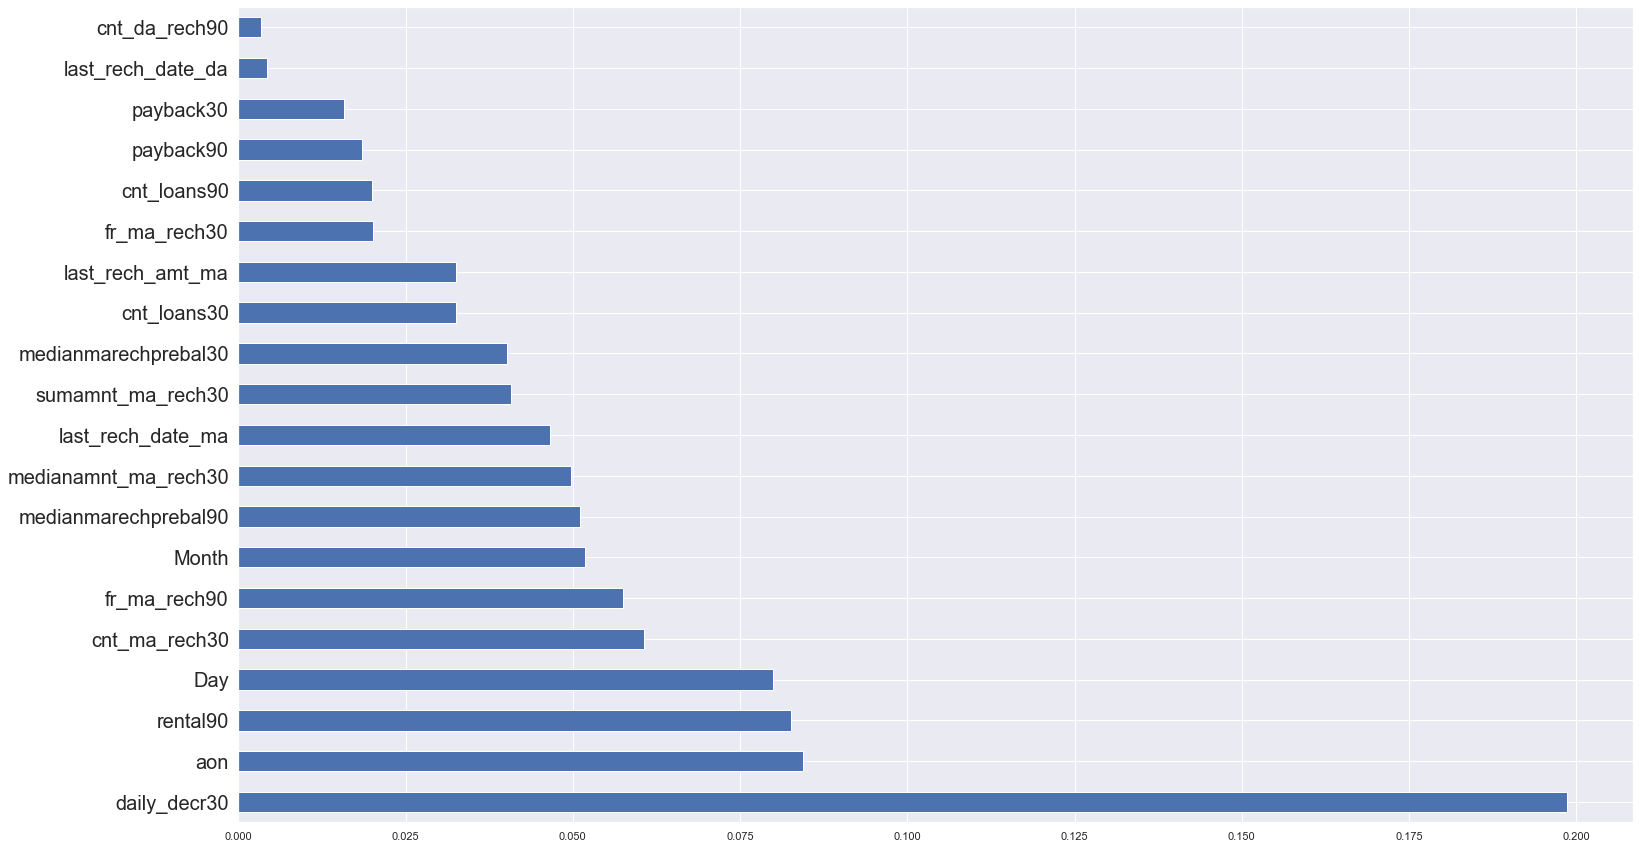

In [105]:
plt.figure(figsize = (25,15))

feature_selection = ['aon','daily_decr30','rental90','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','fr_ma_rech90','medianmarechprebal90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','maxamnt_loans30','cnt_loans90','maxamnt_loans90','payback30','payback90','Day','Month']

etc = ExtraTreeClassifier()
etc.fit(df[feature_selection], df['label'])

etc_features = pd.Series(etc.feature_importances_, index=df[feature_selection].columns)
etc_features.nlargest(20).plot(kind = 'barh')
plt.yticks(fontsize = 20)
plt.show()

#### 'daily_decr30' plays an important role which helps us to understant the data of other feature related with it as well as target variable

## Model Building

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [68]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 43, stratify=y)

In [111]:
#Function for Hyperparemeter tuning
def Performance(model, algorithm):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'_______________{algorithm}___________')
    
    cv_score = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'f1')
    print('Cross_val_score :', np.mean(cv_score))
    print('Accuracy of Trained Dataset: ', model.score(X_train, y_train))
    print('Accuracy of Test Dataset: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

## Base Model : Logistic Regression

In [112]:
log_reg = LogisticRegression(penalty = 'l2', verbose = 1)
Performance(log_reg, 'Logistic Regression')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_______________Logistic Regression___________


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross_val_score : 0.9244576187928608
Accuracy of Trained Dataset:  0.862414334450382
Accuracy of Test Dataset:  0.8610071247433885
[[  649  4073]
 [  531 27871]]
              precision    recall  f1-score   support

           0       0.55      0.14      0.22      4722
           1       0.87      0.98      0.92     28402

    accuracy                           0.86     33124
   macro avg       0.71      0.56      0.57     33124
weighted avg       0.83      0.86      0.82     33124



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


#### Seems like overfitting the model

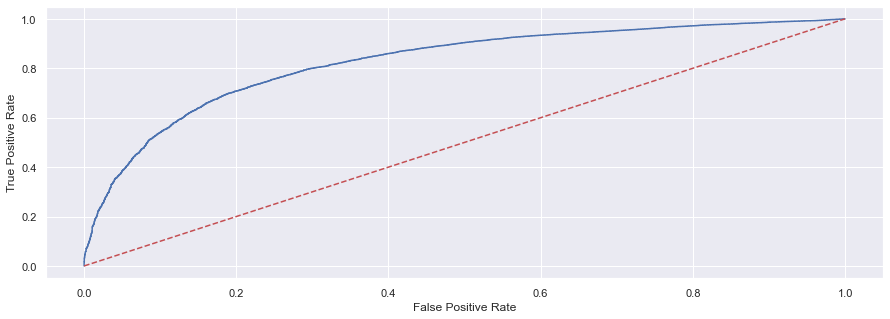

In [116]:
log_pred = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, log_pred)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' )
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Classifier

In [117]:
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy',)

dtc_tuning.fit(X_train,y_train)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 6, 'splitter': 'best'}
0.908130307359451


In [118]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,
                             min_samples_split = 6, splitter = 'best')
Performance(dtc, 'Decision Tree')

_______________Decision Tree___________
Cross_val_score : 0.9476731200875083
Accuracy of Trained Dataset:  0.9127041632702352
Accuracy of Test Dataset:  0.908676488346818
[[ 2538  2184]
 [  841 27561]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63      4722
           1       0.93      0.97      0.95     28402

    accuracy                           0.91     33124
   macro avg       0.84      0.75      0.79     33124
weighted avg       0.90      0.91      0.90     33124



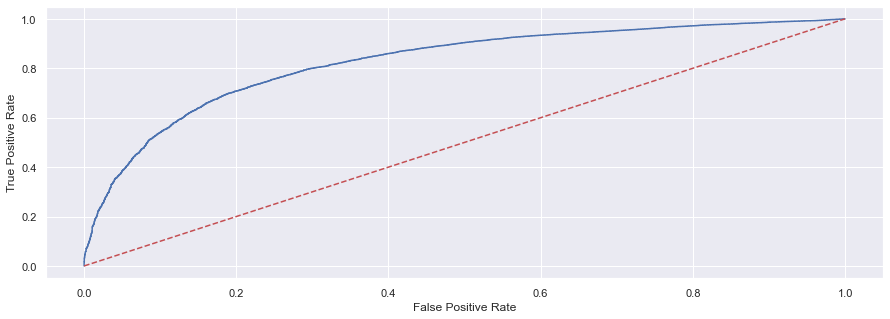

In [119]:
dtc_pred = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, dtc_pred)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' )
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC_ROC_Curve indicates that the prediction on Test Dataset seems to overfit

## Random Forest Classifier

In [126]:
rfc = RandomForestClassifier()
rfc_para = {'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 5,scoring = 'accuracy')
rfc_tuning.fit(X_train,y_train)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'gini', 'max_features': 'sqrt'}
0.9123569648330229


In [127]:
rfc = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt')
Performance(rfc, 'Random Forest')

_______________Random Forest___________
Cross_val_score : 0.9500617391197052
Accuracy of Trained Dataset:  0.9999773571234489
Accuracy of Test Dataset:  0.9121181016785412
[[ 2538  2184]
 [  727 27675]]
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      4722
           1       0.93      0.97      0.95     28402

    accuracy                           0.91     33124
   macro avg       0.85      0.76      0.79     33124
weighted avg       0.91      0.91      0.91     33124



#### Model seems to overfit on Training Dataset

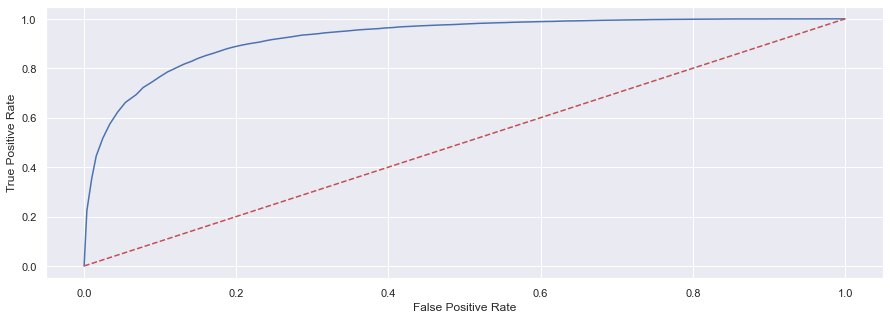

In [128]:
rfc_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_pred)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' )
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SGD Classifier

In [129]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [0.1,1e-02,1e-02,1e-04,1e-05],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10, scoring = 'accuracy')
sgd_tuning.fit(X_train,y_train)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.1, 'learning_rate': 'optimal', 'penalty': 'l2'}
0.8574555448114987


In [131]:
sgd = SGDClassifier(alpha = 0.1, penalty = 'l2', learning_rate = 'optimal')
Performance(sgd, 'SGD Classifier')

_______________SGD Classifier___________
Cross_val_score : 0.9232582142200985
Accuracy of Trained Dataset:  0.8574555444857048
Accuracy of Test Dataset:  0.8574447530491487
[[    0  4722]
 [    0 28402]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4722
           1       0.86      1.00      0.92     28402

    accuracy                           0.86     33124
   macro avg       0.43      0.50      0.46     33124
weighted avg       0.74      0.86      0.79     33124



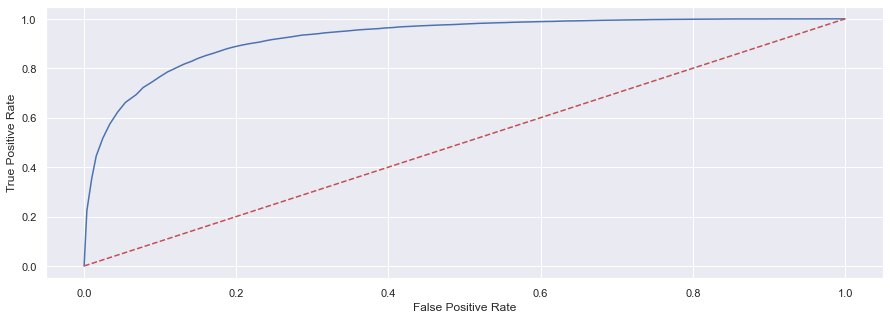

In [132]:
sgd_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, sgd_pred)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' )
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AdaBoost Classifier

In [134]:
from sklearn.ensemble import AdaBoostClassifier
abg = AdaBoostClassifier()
abg_para = {'learning_rate': [1,1.5,2,2.5]}
abg_tuning = GridSearchCV(abg, abg_para, cv = 5, scoring = 'accuracy')
abg_tuning.fit(X_train,y_train)
print(abg_tuning.best_params_)
print(abg_tuning.best_score_)

{'learning_rate': 1.5}
0.9011411869306922


In [135]:
abg = AdaBoostClassifier(learning_rate = 1.5)
Performance(abg, 'AdaBoost Classifier')

_______________AdaBoost Classifier___________
Cross_val_score : 0.9442873171809317
Accuracy of Trained Dataset:  0.9013827249947166
Accuracy of Test Dataset:  0.900495109286318
[[ 2015  2707]
 [  589 27813]]
              precision    recall  f1-score   support

           0       0.77      0.43      0.55      4722
           1       0.91      0.98      0.94     28402

    accuracy                           0.90     33124
   macro avg       0.84      0.70      0.75     33124
weighted avg       0.89      0.90      0.89     33124



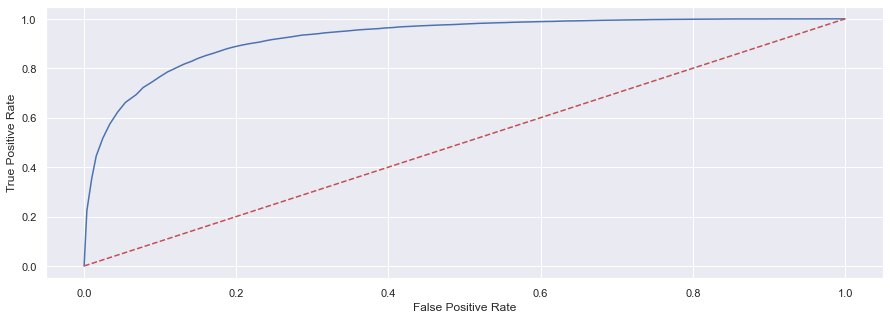

In [136]:
abg_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, abg_pred)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' )
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Since the dataset is imbalanced, we cannot conclude the information from the accuracy score as final accuracy. From the different algorithms applied, Random Forest Classifier have higher accuracy on test dataset and Hence we can take reference of the random forest to predict on unseen data